# Figure - naturalness map

#### Variable declarations

study_boundary_filepath – path to study boundary shapefile <br />
hillshade_filepath – path to hillshade raster <br />
naturalness_filepath – path to naturalness raster <br />
export_filepath – path to export figure

In [2]:
study_boundary_filepath = ""

In [3]:
hillshade_filepath = ""

In [4]:
naturalness_filepath = ""

In [1]:
export_filepath = ""

#### Import statements

In [9]:
import matplotlib.pylab as plt
%matplotlib inline

In [10]:
import rasterio
import fiona
import descartes
from shapely.geometry import Polygon, MultiPolygon, shape
from matplotlib.collections import PatchCollection
from matplotlib_scalebar.scalebar import ScaleBar

#### Open data sources

study boundary

In [11]:
with fiona.open(study_boundary_filepath, 'r') as source_boundary:
    boundary = [MultiPolygon(shape(f['geometry'])) for f in source_boundary]
    bb = boundary[0].bounds
    boundary_bounds = rasterio.coords.BoundingBox(bb[0], bb[1], bb[2], bb[3])
    source_boundary.close()

hillshade

In [12]:
with rasterio.drivers():
    with rasterio.open(hillshade_filepath) as source_hs:
        hs_bounds = source_hs.bounds
        hs = source_hs.read(1)
        source_hs.close()

naturalness

In [13]:
with rasterio.drivers():
    with rasterio.open(naturalness_filepath) as source_natural:
        natural_bounds = source_natural.bounds
        natural = source_natural.read(1)
        source_natural.close()

#### Plot figure

/Users/Jake/code_sandbox/venv/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)
/Users/Jake/code_sandbox/venv/lib/python3.5/site-packages/matplotlib/artist.py:210: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


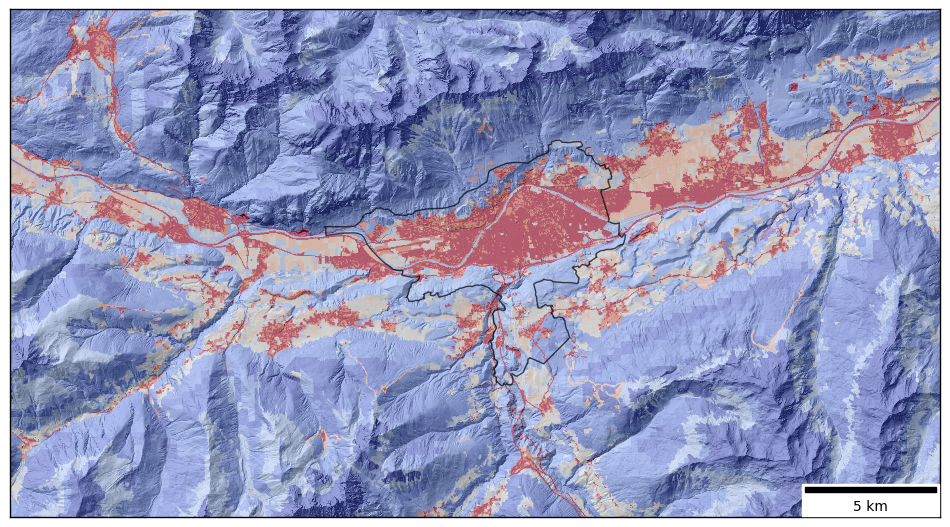

In [20]:
# create figure
fig = plt.figure(figsize=(12,12), dpi=200)

# plot hillshade background
plt.imshow(hs, cmap="gray", extent=(hs_bounds.left, hs_bounds.right, hs_bounds.bottom, hs_bounds.top))
plt.hold(True)
plt.imshow(natural, cmap="coolwarm", alpha=0.5, extent=(natural_bounds.left, natural_bounds.right, natural_bounds.bottom, natural_bounds.top))

# plot study boundary
patches = []
for b in boundary:
    for idx, p in enumerate(b):
        patches.append(descartes.PolygonPatch(p, fc='none', ec='#000000', alpha=0.7))
ax = fig.add_subplot(111)
ax.add_collection(PatchCollection(patches, match_original=True))

# plot sample points
#for f in points:
#    x = f[0]
#    y = f[1]
#    plt.plot(x, y, color="#66FFCC", marker='.')
x_padding = 12000 # meters
y_padding = 5000 # meters

# adjust axes range to the bounds of the study boundary
plt.xlim(boundary_bounds.left - x_padding, boundary_bounds.right + x_padding)
plt.ylim(boundary_bounds.bottom - y_padding, boundary_bounds.top + y_padding)

# figure labeling
scalebar = ScaleBar(1, location="lower right") # 1 pixel = 1 meter
plt.gca().add_artist(scalebar)

#plt.title('Study area')
plt.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    left='off',
    right='off',
    top='off',
    labelbottom='off',
    labelleft='off')
#ax.arrow( 0.5, 0.8, 0.0, -0.2, fc="k", ec="k", head_width=0.05, head_length=0.1 )

plt.show()

fig.savefig(export_filepath)